In [293]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

In [294]:
# update the velocity of the particules
def update_velocity(particles, velocity, pbest, gbest, vmax_x, vmax_y):
    
    r1 = np.random.uniform(0, 1) # choose randomly r1 between 0 and 1
    r2 = np.random.uniform(0, 1)
    inertia = w * velocity # the inertia term 
    cognitive = c1 * r1 * (pbest - particles) # the term of individual exploration
    social = c2 * r2 * (particles - gbest) # the term of global search
    new_velocity = inertia + cognitive - social # it adds up to give the new velocity 

    # for the velocity on the axis x

    idx = np.where(new_velocity[0, :] > vmax_x) # take all the velocities greater than the clamping velocity 
    new_velocity[0, :][idx] = vmax_x # fix the large velocities to vmax
    idx = np.where(new_velocity[0, :] < -vmax_x) # likewise but for negative velocities
    new_velocity[0, :][idx] = -vmax_x

    # for the velocity on the axis the axis y


    idx = np.where(new_velocity[1, :] > vmax_y) # take all the velocities greater than the clamping velocity 
    new_velocity[1, :][idx] = vmax_y # fix the large velocities to vmax
    idx = np.where(new_velocity[1, :] < -vmax_y) # likewise but for negative velocities
    new_velocity[1, :][idx] = -vmax_y

    return new_velocity



In [295]:
def update_position(particles, velocity):
    
    new_particles = particles + velocity # moving the particles

    # for the axis x
    
    idx = np.where(new_particles[0, :]  > x_sup) # take the particles that do not satisfy the constraint 
    new_particles[0, :][idx] = x_sup # block the particle at the upper-bound
    idx = np.where(new_particles[0, :][idx] < x_inf) # same for the lower bound
    new_particles[0, :][idx] = x_inf

    # for the axis y


    idx = np.where(new_particles[1, :]  > y_sup) # take the particles that do not satisfy the constraint 
    new_particles[1, :][idx] = y_sup # block the particle at the upper-bound
    idx = np.where(new_particles[1, :][idx] < y_inf) # same for the lower bound
    new_particles[1, :][idx] = y_inf


    return new_particles 


In [296]:
def update_best(pbest, gbest, particles):
    obj = np.apply_along_axis(function, axis=0, arr=particles)# compute the new objectives
    if obj.min() < function(gbest): # if a new best global is reached we take it
        gbest = particles[:,np.argmin(obj)]

    idx = np.where(obj < np.apply_along_axis(function, axis=0, arr=pbest)) # we update the personal bests 
    pbest[:,idx] = particles[:,idx]
    return pbest, gbest.reshape(-1, 1)


In [297]:
def run_pso(N, T, c1, c2, w, k, x_inf, x_sup, y_inf, y_sup, function):

    vmax_x = k*(x_sup - x_inf)/2
    vmax_y = k*(y_sup - y_inf)/2  # The clamping velocity 
    

    # Initialization

    particles = np.stack((np.random.uniform(x_inf, x_sup, N), np.random.uniform(y_inf, y_sup, N)), axis=0) # take randomly N initial particles 
    velocity = np.zeros_like(particles) # set the velocities to zeo at the beginning 
    pbest = np.copy(particles) # the personal bests position are the initial positions 
    gbest = pbest[:,np.argmin(np.apply_along_axis(function, axis=0, arr=pbest))].reshape(-1, 1)# the global best is the minimum 
    minimizer = []
    dynamic = [np.copy(particles)]# we store the trajectory of the particles 

    for _ in tqdm(range(T)): # we loop T times to have a dynamic of T periods 

            
        velocity = update_velocity(particles, velocity, pbest, gbest, vmax_x, vmax_y) # compute the velocity 
        particles = update_position(particles, velocity) # new particles 
        dynamic.append(np.copy(particles)) # store the new population 
        pbest, gbest = update_best(pbest, gbest, particles) # update the best postions 
        minimizer.append(gbest)

    return minimizer, dynamic # return the best position and the trajectory 


### **Example of the paraboloid**

In [298]:
def paraboloid(x):
    return x[0]**2 + x[1]**2
    


In [299]:
c1, c2, w, k = 1.9, 1, 0.9, 0.5 # to compute the velocity 
T = 30 # Time 
N = 20 # Number of particles 
x_inf = -5 # upper bound
x_sup = 5 # lower bound
y_inf = -5 # upper bound
y_sup = 5 # lower bound

In [300]:
function = paraboloid
minimizer, dynamic = run_pso(N, T, c1, c2, w, k, x_inf, x_sup, y_inf, y_sup, function)


100%|██████████| 30/30 [00:00<00:00, 3785.81it/s]


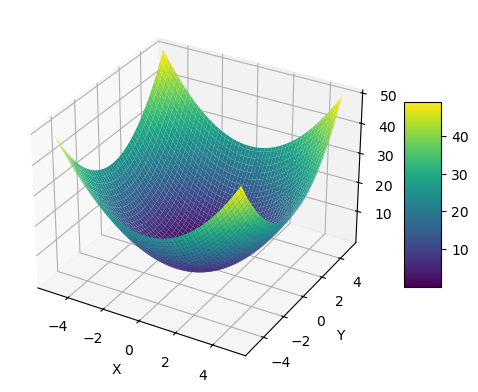

In [337]:

# Définir les limites de la grille
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Créer un maillage
X, Y = np.meshgrid(x, y)

# Définir la fonction


def paraboloid(x):
    return x[0]**2+x[1]**2


# Calculer Z
Z = np.array([[paraboloid([X[i, j], Y[i, j]]) for j in range(X.shape[1])] for i in range(X.shape[0])])

# Créer une figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface avec une colormap
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

# Ajouter une barre de couleurs
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

# Ajouter des labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Afficher le graphique
plt.show()


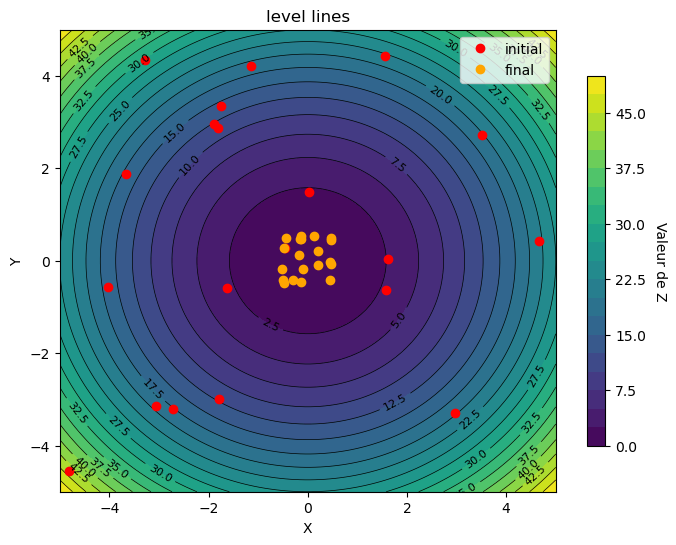

In [338]:


# Définir les limites de la grille
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Créer un maillage
X, Y = np.meshgrid(x, y)

# Définir la fonction
def paraboloid(x):
    return x[0]**2+x[1]**2

# Calculer Z

Z = np.array([[paraboloid([X[i, j], Y[i, j]]) for j in range(X.shape[1])] for i in range(X.shape[0])])

# Créer une figure
fig, ax = plt.subplots(figsize=(8, 6))

# Tracer les lignes de niveau remplies avec la colormap
contour_filled = ax.contourf(X, Y, Z, 20, cmap='viridis')

# Ajouter des lignes de niveau
contour_lines = ax.contour(X, Y, Z, 20, colors='black', linewidths=0.5)
plt.plot(dynamic[0][0,:], dynamic[0][1,:], marker = 'o', color = 'red', ls = '', label = 'initial')
plt.plot(dynamic[-1][0,:], dynamic[-1][1,:], marker = 'o', color = 'orange', ls = '', label = 'final')


# Ajouter une barre de couleurs pour indiquer le gradient
colorbar = fig.colorbar(contour_filled, ax=ax, orientation='vertical', shrink=0.8)
colorbar.set_label('Valeur de Z', rotation=270, labelpad=15)

# Ajouter des labels aux lignes de niveau
ax.clabel(contour_lines, inline=True, fontsize=8)

# Ajouter des labels aux axes
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Ajouter un titre
ax.set_title('level lines')
plt.legend()

# Afficher le graphique
plt.show()


### Compute the norm of the best minimizer across time to see if it converges to zero

In [341]:
norm_minimizer = np.sqrt(np.array([minimizer[i][0, 0] for i in range(len(minimizer))])**2 \
                       + np.array([minimizer[i][1, 0] for i in range(len(minimizer))])**2)

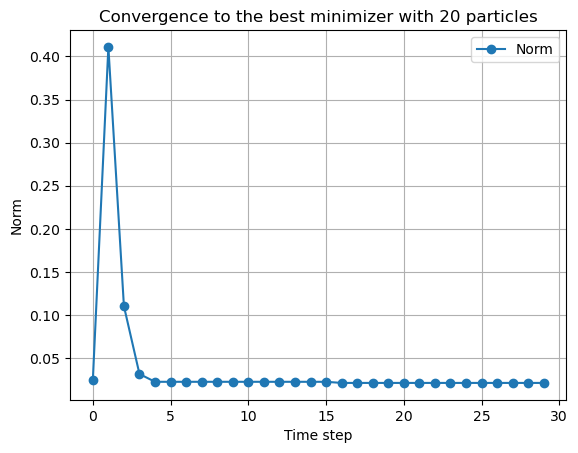

In [343]:
plt.plot(np.arange(T), norm_minimizer, marker = 'o', label = 'Norm')
plt.xlabel('Time step')
plt.ylabel('Norm')
plt.title(f'Convergence of the best minimizer with {N} particles')
plt.grid()
plt.legend()

plt.show()


## **Test on the four tricky function presented in the notebook 1d_pso**

### Definition of $\texttt{visualize\_2d\_pso}$ to be more efficient
- $\texttt{visualize\_function}$ to visualize the function in the domain of search

In [345]:
def visualize_function(function, x_inf, x_sup, y_inf, y_sup):

    # Créer les points x et y
    x = np.linspace(x_inf, x_sup, 100)
    y = np.linspace(y_inf, y_sup, 100)
    
    # Créer un maillage
    X, Y = np.meshgrid(x, y)

    
    # Appliquer la fonction au maillage
    Z = np.array([[function([X[i, j], Y[i, j]]) for j in range(X.shape[1])] for i in range(X.shape[0])])
    
    # Créer une figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Tracer la surface avec une colormap
    surface = ax.plot_surface(X, Y, Z, cmap='viridis')
    
    # Ajouter une barre de couleurs
    fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
    
    # Ajouter des labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Afficher le graphique
    plt.show()


- $\texttt{visualize\_particle}$ to visualize the dunamic of the particle with the gradient and level lines 

In [346]:
# Définir les limites de la grille

def visualize_particle(function, x_inf, x_sup, y_inf, y_sup, dynamic):

    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    
    # Créer un maillage
    X, Y = np.meshgrid(x, y)
    
    
    
    # Calculer Z
    Z = np.array([[function([X[i, j], Y[i, j]]) for j in range(X.shape[1])] for i in range(X.shape[0])])
    
    # Créer une figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Tracer les lignes de niveau remplies avec la colormap
    contour_filled = ax.contourf(X, Y, Z, 20, cmap='viridis')
    
    # Ajouter des lignes de niveau
    contour_lines = ax.contour(X, Y, Z, 20, colors='black', linewidths=0.5)
    plt.plot(dynamic[0][0,:], dynamic[0][1,:], marker = 'o', color = 'red', ls = '', label = 'initial')
    plt.plot(dynamic[-1][0,:], dynamic[-1][1,:], marker = 'o', color = 'orange', ls = '', label = 'final')
    
    
    # Ajouter une barre de couleurs pour indiquer le gradient
    colorbar = fig.colorbar(contour_filled, ax=ax, orientation='vertical', shrink=0.8)
    colorbar.set_label('Valeur de Z', rotation=270, labelpad=15)
    
    # Ajouter des labels aux lignes de niveau
    ax.clabel(contour_lines, inline=True, fontsize=8)
    
    # Ajouter des labels aux axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    # Ajouter un titre
    ax.set_title('level lines')
    plt.legend()
    
    # Afficher le graphique
    plt.show()



- When it adds up it gives $\texttt{visualize\_2d\_pso}$ to visualize the result of the algorithm properly

In [347]:
def visualize_2d_pso(N, T, c1, c2, w, k, x_inf, x_sup, function):
    
    minimizer, dynamic = run_pso(N, T, c1, c2, w, k, x_inf, x_sup, y_inf, y_sup, function)
    
    visualize_function(function, x_inf, x_sup, y_inf, y_sup)
    visualize_particle(function, x_inf, x_sup, y_inf, y_sup, dynamic)

    
    norm_minimizer = np.sqrt(np.array([minimizer[i][0, 0] for i in range(len(minimizer))])**2 \
                       + np.array([minimizer[i][1, 0] for i in range(len(minimizer))])**2)

    
    plt.plot(np.arange(T), norm_minimizer, marker = 'o', label = 'Norm')
    plt.xlabel('Time step')
    plt.ylabel('Norm')
    plt.title(f'Convergence of the best minimizer with {N} particles')
    plt.grid()
    plt.legend()
    
    plt.show()



    
    
    


### For all the following function we set the same constants

In [348]:
# Initialization constants

c1, c2, w, k = 1.9, 1, 0.9, 0.5 # to compute the velocity 
T = 30 # Time 
N = 20 # Number of particles 
x_inf = -5 # upper bound
x_sup = 5 # lower bound
y_inf = -5 # upper bound
y_sup = 5 # lower bound

### **Alpine function** 
$\forall (x, y)\in \mathbb{R}^2,\; f(x, y) = |x\sin(x) + 0.1x|+|y\sin(y)+0.1y|$

In [349]:
def alpine(x):
    return np.abs(x[0]*np.sin(x[0])+0.1*x[0])+np.abs(x[1]*np.sin(x[1])+0.1*x[1])

100%|██████████| 30/30 [00:00<00:00, 1925.61it/s]


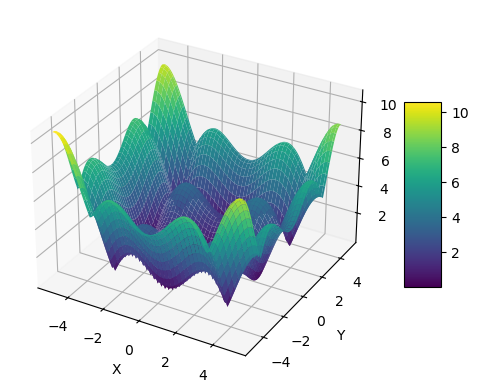

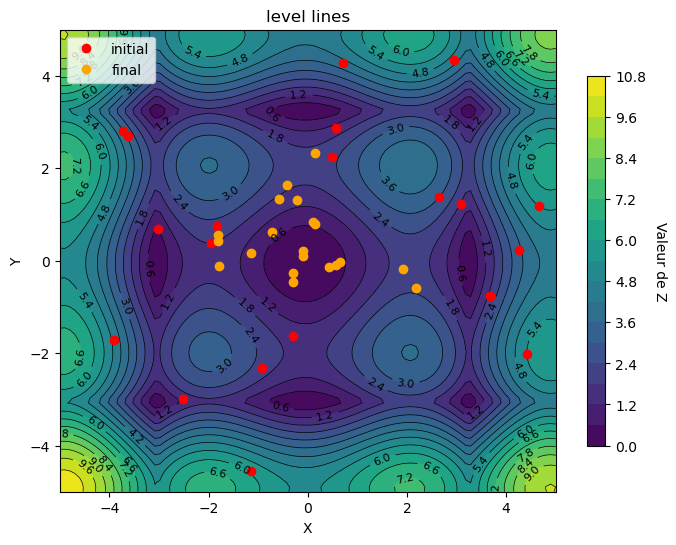

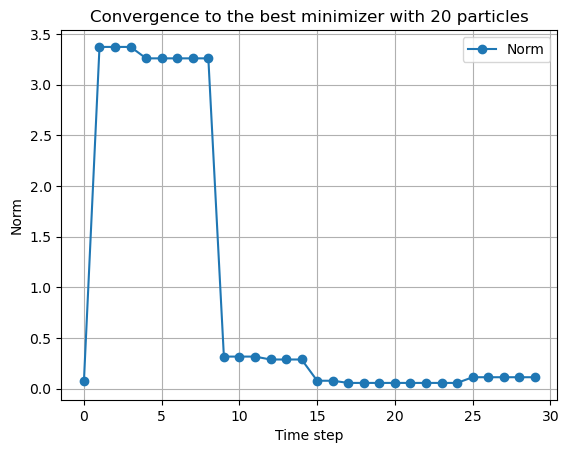

In [355]:
function = alpine
visualize_2d_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)

### **Ackley function** :  
$
\forall (x, y)\in\mathbb{R}^2, \;f(x, y) = -20 \exp\left(-0.2 \sqrt{0.5 \left( x^2 + y^2 \right)}\right) - \exp\left(0.5 \left( \cos(2\pi x) + \cos(2\pi y) \right)\right) + e + 20
$


In [357]:
def ackley(x):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2+x[1]**2))) - np.exp(0.5*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1])))+np.exp(1)+20

100%|██████████| 30/30 [00:00<00:00, 1024.37it/s]


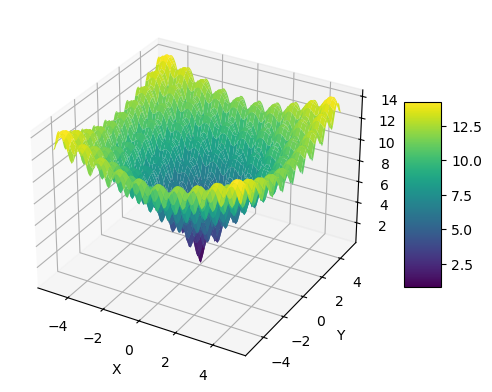

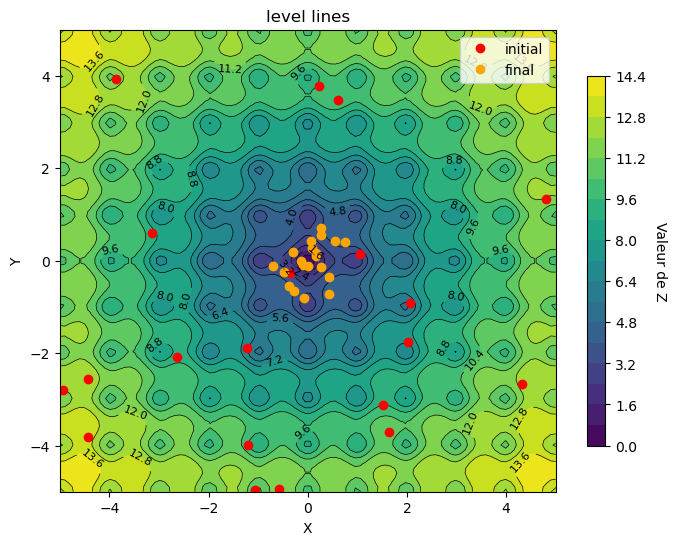

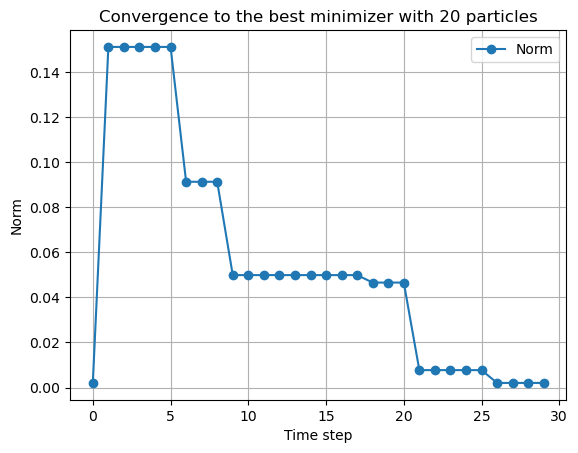

In [359]:
function = ackley
visualize_2d_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)

### **Rastrigin  function** :  
$
\forall (x, y)\in \mathbb{R}^2,\; f(x, y) = 20 + x^2 + y^2 - 10 \left( \cos(2\pi x) + \cos(2\pi y) \right)
$

In [370]:
def rastrigin(x):
    return 20+x[0]**2+x[1]**2-10*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))

100%|██████████| 30/30 [00:00<00:00, 1726.34it/s]


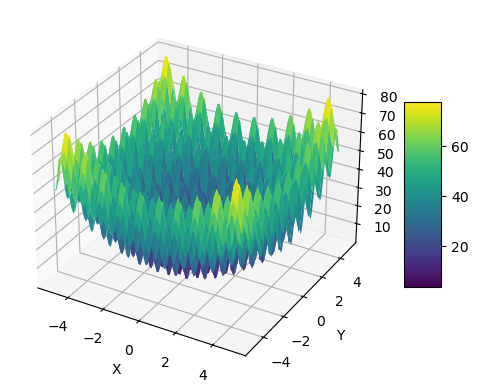

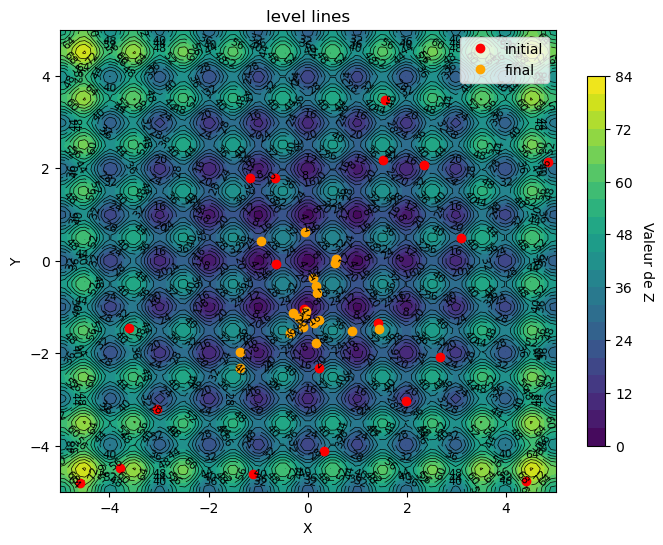

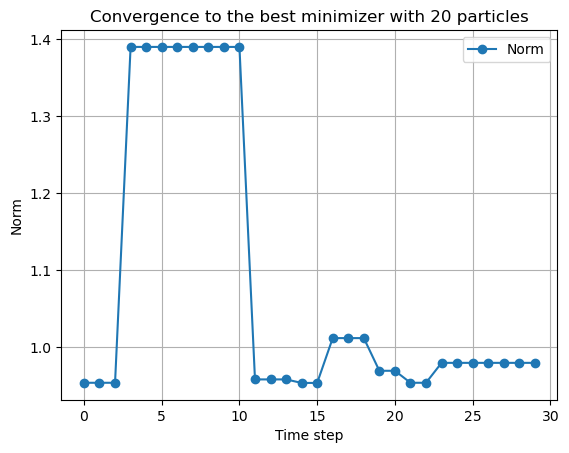

In [371]:
function = rastrigin
visualize_2d_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)

### **Xinsheyang2 function** : 
$\forall (x, y)\in \mathbb{R}^2,\; f(x, y) = ( \left| x \right| + \left| y \right|) \cdot \exp\left( -\left( \sin x^2 + \sin y^2 \right) \right)$

In [368]:
def xinsheyang2(x):
    return (np.abs(x[0])+np.abs(x[1]))*np.exp(-(np.sin(x[0]**2)+np.sin(x[1]**2)))

100%|██████████| 30/30 [00:00<00:00, 1539.61it/s]


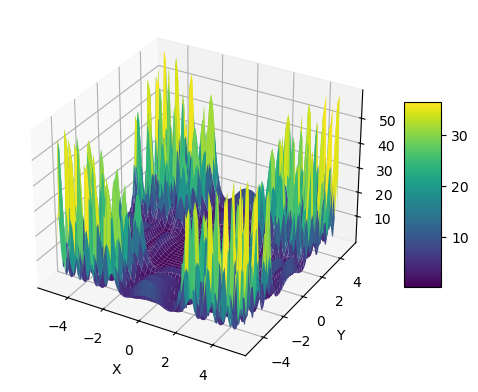

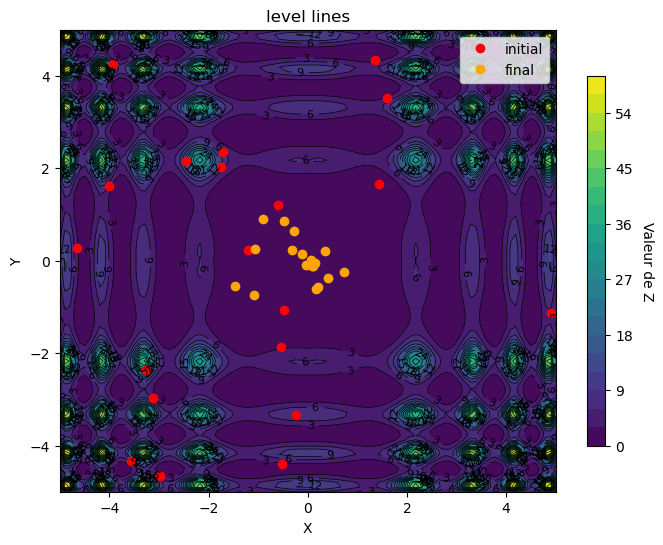

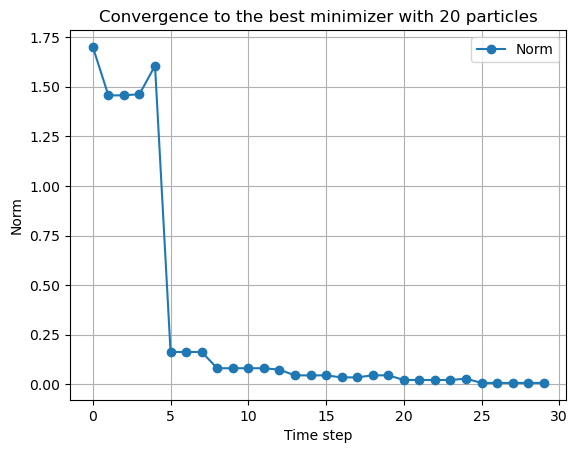

In [369]:
function = xinsheyang2
visualize_2d_pso(N, T, c1, c2, w, k, x_inf, x_sup, function)